<a href="https://colab.research.google.com/github/ryandale7/ML-on-Graphs/blob/main/14_Graph_Level_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automated Download and Extraction

In this approach, we will:
- Mount Google Drive.
- Create or navigate to a `Data` subfolder under Colab Notebooks.
- Use `curl` to download the `.gz` file from the repository.
- Extract (unzip) the `.gz` file using `gunzip`.
- Verify the extracted files.
- Load the dataset.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Change directory to the Data subfolder (adjust the path if needed)
%cd /content/drive/MyDrive/Colab\ Notebooks/Data

# Download the dataset (.gz file)
!curl -O https://snap.stanford.edu/data/redditSubmissions.csv.gz

# Extract the downloaded file
!gunzip redditSubmissions.csv.gz

# Verify the extracted file
!ls -l

# Load the dataset using pandas
import pandas as pd
# Use the Python engine and skip problematic lines to fix parsing errors
df = pd.read_csv('redditSubmissions.csv', engine='python', on_bad_lines='skip')
print(df.head())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Data
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 7444k  100 7444k    0     0  1281k      0  0:00:05  0:00:05 --:--:-- 1632k
gzip: redditSubmissions.csv already exists; do you wish to overwrite (y or n)? y
total 253386
-rw------- 1 root root   114992 Feb  7 12:50 as20000102.txt
-rw------- 1 root root  1431846 Feb  7 16:06 as-caida20071105.txt
-rw------- 1 root root   447101 Feb  7 16:05 as-caida20071105.txt.gz
-rw------- 1 root root  5284478 Feb  7 09:36 ca-AstroPh.txt
-rw------- 1 root root  6704722 Jan 10 19:22 cit-HepPh.txt
-rw------- 1 root root  5576851 Feb  7 09:02 cit-HepTh.txt
-rw------- 1 root root  1150439 Jan 16 12:52 CollegeMsg.txt
-rw------- 1 root root 12585884 Jan 10 18:46 com-amazon.ungraph

# Manual Upload Instructions

If the automated method is not feasible, or you prefer manual steps:
- Download the `redditSubmissions.csv.gz` file from the repository to your local machine.
- Extract it locally (e.g., right-click and unzip, or use `gunzip` on macOS/Linux).
- Create or navigate to a `Data` subfolder under Colab Notebooks on your Google Drive.
- Upload the extracted `redditSubmissions.csv` file into the `Data` subfolder.
- Open or create a Colab notebook.
- Mount Google Drive and change the directory to the `Colab Notebooks/Data` folder.
- Load and verify the dataset.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Change directory to the Data folder in Colab Notebooks (adjust the path if necessary)
%cd /content/drive/MyDrive/Colab\ Notebooks/Data

import pandas as pd
# Use the Python engine and skip problematic lines to fix parsing errors
df = pd.read_csv('redditSubmissions.csv', engine='python', on_bad_lines='skip')
print(df.head())



In [14]:
# Running black

from google.colab import drive

# Install nbqa and black (required each new session)
!pip install nbqa black

# Run nbqa black on all notebooks in the current directory
!nbqa black .


No notebooks found in given path(s)


## Unit 14: Graph-Level Learning  
### Section 1: Graph Classification Tasks and Their Significance  
**Objective:**  
- Understand the fundamentals of graph classification tasks.  
- Recognize the importance of classifying entire graphs in various applications.  

**Introduction:**  
- Graph classification involves assigning labels to whole graphs rather than individual nodes.  
- This task is significant in domains such as social networks, bioinformatics, and multimedia analysis.  

**Key Points:**  
- Graph classification evaluates the entire graph structure instead of isolated node properties.  
- It provides insights into global graph behavior and network properties.  
- It supports applications like community detection and network performance analysis.


Columns in the dataset: Index(['#image_id', 'unixtime', 'rawtime', 'title', 'total_votes', 'reddit_id',
       'number_of_upvotes', 'subreddit', 'number_of_downvotes', 'localtime',
       'score', 'number_of_comments', 'username'],
      dtype='object')
Graph Classification Model Accuracy: 1.0


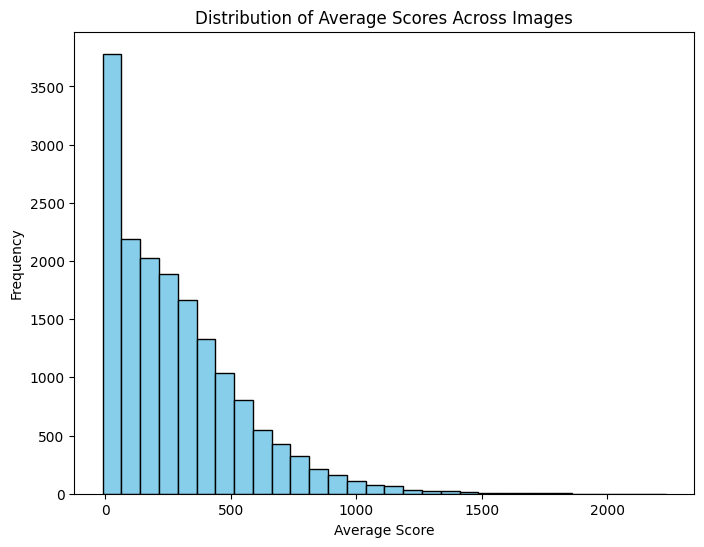

In [9]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the dataset using the Python engine and skip problematic lines
df = pd.read_csv('redditSubmissions.csv', engine='python', on_bad_lines='skip')
print("Columns in the dataset:", df.columns)

# Group submissions by '#image_id' to simulate individual graphs.
graph_features = []
for image_id, group in df.groupby('#image_id'):
    # Create a dummy graph: nodes represent submission IDs for the same image.
    # Drop rows with None values in 'reddit_id' column before creating the graph
    group = group.dropna(subset=['reddit_id'])
    # If you want to keep the rows and replace None with a placeholder, use:
    # group['reddit_id'] = group['reddit_id'].fillna('missing_id')
    G = nx.from_pandas_edgelist(group, source='reddit_id', target='reddit_id', create_using=nx.Graph())
    num_submissions = group.shape[0]
    avg_score = group['score'].mean() if 'score' in group.columns else 0
    total_comments = group['number_of_comments'].sum() if 'number_of_comments' in group.columns else 0
    graph_features.append([num_submissions, avg_score, total_comments])


# Create a DataFrame of graph-level features
features_df = pd.DataFrame(graph_features, columns=['num_submissions', 'avg_score', 'total_comments'])

# Define dummy labels: 1 if average score is above the median, else 0
median_score = features_df['avg_score'].median()
labels = (features_df['avg_score'] > median_score).astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df, labels, test_size=0.2, random_state=42)

# Train a simple graph classifier using RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Graph Classification Model Accuracy:", accuracy)

# Visualize the distribution of average scores across images
plt.figure(figsize=(8, 6))
plt.hist(features_df['avg_score'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.title('Distribution of Average Scores Across Images')
plt.show()


**Observations & Explanations:**  
- The dataset is grouped by `image_id` to simulate individual graphs, with each group representing submissions of a unique image.  
- Graph-level features such as the number of submissions, average score, and total comments are extracted.  
- A dummy label is assigned based on whether the average score exceeds the median across all images.  
- A RandomForestClassifier is trained to classify graphs, and its accuracy is reported.  
- The histogram visualizes the distribution of average scores, offering insights into the dataset's structure.


**Practical Activities:**  
- Develop a more advanced graph classifier by incorporating additional graph metrics (e.g., clustering coefficient, connectivity).  
- Experiment with alternative feature extraction methods and compare the resulting classification performance.  
- Visualize correlations between various graph-level features and the assigned labels.


**Quiz:**  
1. What distinguishes graph classification from node-level classification?  
2. Why is graph classification important in real-world applications?


## Section 2: Pooling Techniques for Graph-Level Learning

**Objective:**  
- Learn various pooling techniques to aggregate node features into graph-level representations.  
- Understand the differences between mean, max, and attention-based pooling methods.

**Introduction:**  
- Pooling in graph neural networks transforms variable-size node embeddings into fixed-size graph-level representations.  
- This process aggregates information across nodes to form a summary of the entire graph.

**Key Points:**  
- **Mean Pooling:** Computes the average of node features.  
- **Max Pooling:** Selects the maximum value among node features.  
- **Attention-Based Pooling:** Weighs node features according to their importance.

**Code Examples:**  
- Demonstration of mean, max, and attention-based pooling on a sample graph with synthetic node features.  
- Visualization of the resulting graph-level feature vectors.  
- Comparative analysis of pooling methods' impact on feature aggregation.

**Observations & Explanations:**  
- Mean pooling provides a balanced summary but may dilute strong signals.  
- Max pooling captures the most prominent feature values but might ignore the overall distribution.  
- Attention-based pooling adaptively weights nodes, offering a more flexible representation.

**Practical Activities:**  
- Implement each pooling technique on synthetic data.  
- Visualize the pooled feature vectors.  
- Evaluate how different pooling strategies affect a simple downstream task (e.g., classification).

**Quiz:**  
1. What is the main purpose of pooling in graph neural networks?  
2. How does attention-based pooling differ from mean and max pooling?


Mean Pooling Output:
 [0.46755925 0.6224496  0.61914136 0.50490886 0.45494692]
Max Pooling Output:
 [0.94819355 0.99221286 0.97763028 0.9994787  0.83471613]
Attention-Based Pooling Output:
 [0.44847237 0.73179518 0.61007494 0.62466883 0.49642556]


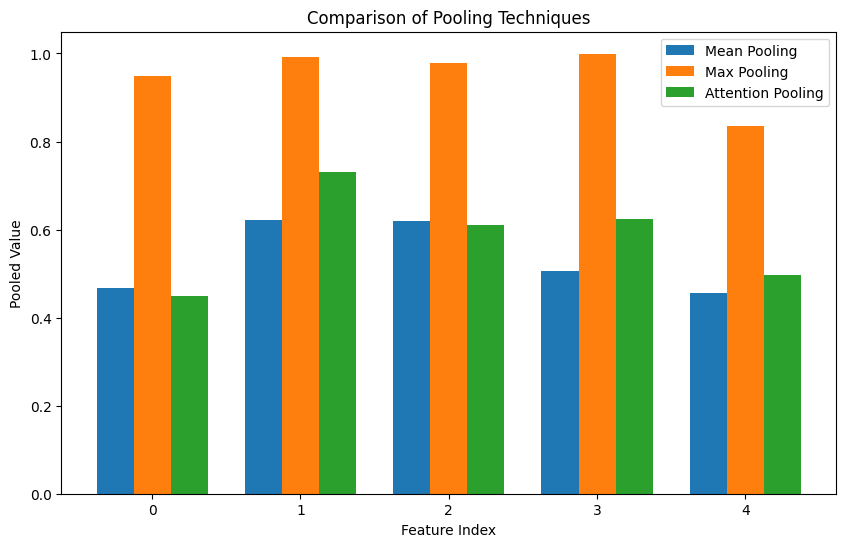

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Create a sample graph with random node features
num_nodes = 10
feature_dim = 5

# Generate a random graph using the Erdős-Rényi model
G = nx.erdos_renyi_graph(num_nodes, 0.5, seed=42)

# Assign random feature vectors to each node
node_features = {node: np.random.rand(feature_dim) for node in G.nodes()}
for node in G.nodes():
    G.nodes[node]['features'] = node_features[node]

# Collect all node features into a matrix
features_matrix = np.array([G.nodes[node]['features'] for node in G.nodes()])

# Mean Pooling: Compute the average of node features
mean_pool = np.mean(features_matrix, axis=0)

# Max Pooling: Compute the maximum value for each feature across nodes
max_pool = np.max(features_matrix, axis=0)

# Attention-Based Pooling:
# For simplicity, use a random linear transformation to compute attention scores, then apply softmax.
random_weights = np.random.rand(feature_dim)
attention_scores = np.dot(features_matrix, random_weights)
attention_scores = np.exp(attention_scores) / np.sum(np.exp(attention_scores))
attention_pool = np.sum(features_matrix * attention_scores[:, np.newaxis], axis=0)

# Print pooled feature vectors
print("Mean Pooling Output:\n", mean_pool)
print("Max Pooling Output:\n", max_pool)
print("Attention-Based Pooling Output:\n", attention_pool)

# Visualize the pooled feature vectors as bar charts
x = np.arange(feature_dim)
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, mean_pool, width, label='Mean Pooling')
plt.bar(x, max_pool, width, label='Max Pooling')
plt.bar(x + width, attention_pool, width, label='Attention Pooling')
plt.xlabel('Feature Index')
plt.ylabel('Pooled Value')
plt.title('Comparison of Pooling Techniques')
plt.legend()
plt.show()


## Section 3: Applications in Graph-Level Learning: Molecule Classification and Anomaly Detection

**Objective:**  
- Explore practical applications of graph-level learning.  
- Understand how graph classification can be applied to tasks such as molecule classification and anomaly detection.

**Introduction:**  
- In real-world scenarios, graph-level learning is used to analyze complex structures.  
- Molecule classification involves analyzing molecular graphs for drug discovery, while anomaly detection focuses on identifying unusual patterns in network data.

**Key Points:**  
- Molecule classification aids in understanding chemical properties by examining graph structures of molecules.  
- Anomaly detection identifies irregular or fraudulent behavior by spotting deviations in graph-level features.  
- Graph-level features extracted from data can be used to simulate both tasks even if the dataset is not originally molecular.

**Code Examples:**  
- Code to construct graph representations from the dataset suitable for classification.  
- Visualization of anomaly detection results based on graph-level features.  
- Example models demonstrating dummy molecule classification and anomaly detection using the provided redditSubmissions dataset.

**Observations & Explanations:**  
- Feature extraction from grouped data provides global descriptors that can serve as inputs for classification models.  
- Anomaly detection can be performed by identifying outliers in features such as average score and total comments.  
- Dummy molecule classification can be simulated by treating each image graph as a molecule with randomly assigned labels.

**Practical Activities:**  
- Build an anomaly detection model (e.g., using Isolation Forest) on the graph-level features.  
- Simulate a molecule classification task by assigning synthetic labels and training a classifier.  
- Visualize and compare results from both applications.

**Quiz:**  
1. How can graph-level learning be applied in molecule classification?  
2. What role do graph features play in anomaly detection?


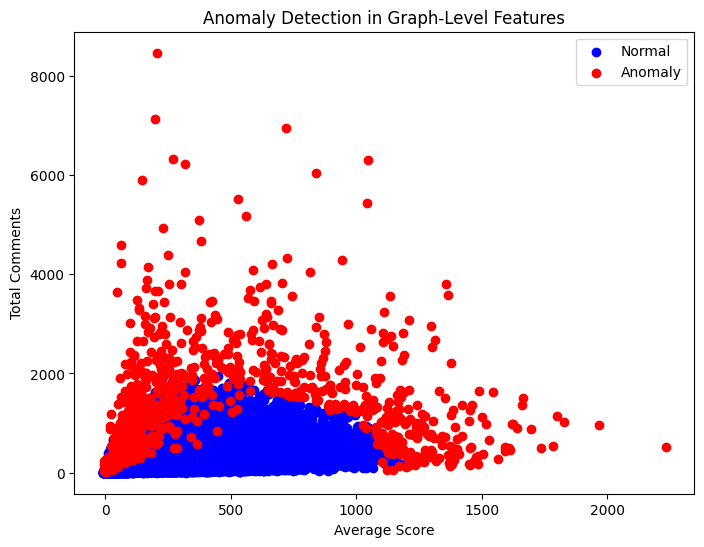

Molecule Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1665
           1       1.00      1.00      1.00      1683

    accuracy                           1.00      3348
   macro avg       1.00      1.00      1.00      3348
weighted avg       1.00      1.00      1.00      3348



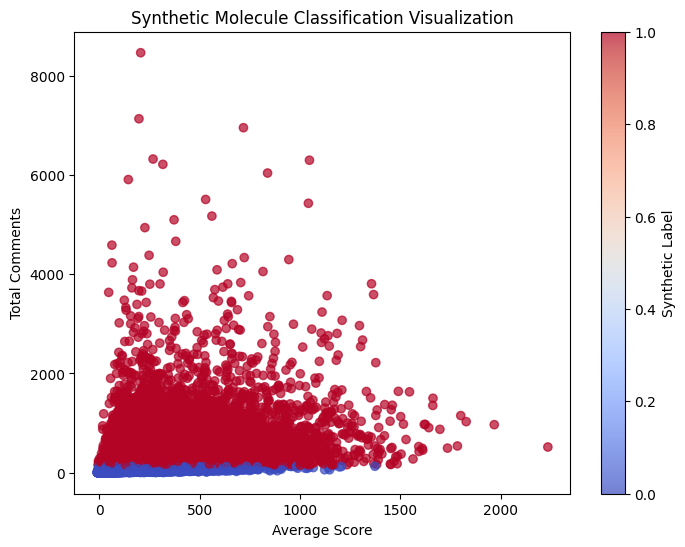

In [11]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Load the dataset (assumes previous preprocessing from Section 1)
df = pd.read_csv('redditSubmissions.csv', engine='python', on_bad_lines='skip')

# Group submissions by '#image_id' to simulate individual graphs.
graph_features = []
for image_id, group in df.groupby('#image_id'):
    group = group.dropna(subset=['reddit_id'])
    G = nx.from_pandas_edgelist(group, source='reddit_id', target='reddit_id', create_using=nx.Graph())
    num_submissions = group.shape[0]
    avg_score = group['score'].mean() if 'score' in group.columns else 0
    total_comments = group['number_of_comments'].sum() if 'number_of_comments' in group.columns else 0
    graph_features.append([num_submissions, avg_score, total_comments])

# Create a DataFrame of graph-level features
features_df = pd.DataFrame(graph_features, columns=['num_submissions', 'avg_score', 'total_comments'])

# ------------------------------
# Anomaly Detection Example
# ------------------------------
# Using IsolationForest to detect outliers in graph features
iso_forest = IsolationForest(contamination=0.05, random_state=42)
anomaly_labels = iso_forest.fit_predict(features_df)
# In IsolationForest, -1 indicates an anomaly, 1 indicates normal
features_df['anomaly'] = anomaly_labels

# Visualize anomalies based on avg_score vs. total_comments
plt.figure(figsize=(8, 6))
normal = features_df[features_df['anomaly'] == 1]
anomalies = features_df[features_df['anomaly'] == -1]
plt.scatter(normal['avg_score'], normal['total_comments'], c='blue', label='Normal')
plt.scatter(anomalies['avg_score'], anomalies['total_comments'], c='red', label='Anomaly')
plt.xlabel('Average Score')
plt.ylabel('Total Comments')
plt.title('Anomaly Detection in Graph-Level Features')
plt.legend()
plt.show()

# ------------------------------
# Dummy Molecule Classification Example
# ------------------------------
# For simulation, assign synthetic labels for molecule classification:
# Label 1 if total_comments > median, else 0.
median_comments = features_df['total_comments'].median()
synthetic_labels = (features_df['total_comments'] > median_comments).astype(int)

# Split data for classification
X_train, X_test, y_train, y_test = train_test_split(features_df[['num_submissions', 'avg_score', 'total_comments']],
                                                    synthetic_labels, test_size=0.2, random_state=42)

# Train a RandomForestClassifier as a dummy molecule classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Molecule Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the distribution of synthetic labels with respect to avg_score
plt.figure(figsize=(8, 6))
plt.scatter(features_df['avg_score'], features_df['total_comments'], c=synthetic_labels, cmap='coolwarm', alpha=0.7)
plt.xlabel('Average Score')
plt.ylabel('Total Comments')
plt.title('Synthetic Molecule Classification Visualization')
plt.colorbar(label='Synthetic Label')
plt.show()


## Section 4: Building Graph-Level ML Pipelines

**Objective:**  
- Learn to construct end-to-end machine learning pipelines for graph-level tasks.  
- Integrate data preprocessing, model training, evaluation, and explainability into a unified workflow.

**Introduction:**  
- A graph-level ML pipeline automates data preprocessing, feature extraction, model training, and evaluation.  
- A seamless, reproducible workflow is crucial for handling complex graph data effectively.

**Key Points:**  
- Data preprocessing and feature extraction form the foundation of the pipeline.  
- Model training and evaluation are core components of the workflow.  
- Integration of explainability tools enhances transparency and aids in debugging.

**Code Examples:**  
- Build a complete graph-level ML pipeline using the provided dataset.  
- Visualize individual pipeline components and the overall workflow.  
- Demonstrate automated data processing, model training, and performance evaluation.

**Observations & Explanations:**  
- Each pipeline component contributes to a streamlined, scalable process.  
- Reproducibility and integration of explainability are key benefits.  
- Performance metrics provide insights into model effectiveness and guide further optimization.

**Practical Activities:**  
- Construct a full ML pipeline for graph classification.  
- Experiment with various preprocessing and feature extraction techniques.  
- Evaluate the pipeline using standard performance metrics.

**Quiz:**  
1. What are the key components of a graph-level ML pipeline?  
2. Why is pipeline integration important for graph-level learning?


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1665
           1       1.00      1.00      1.00      1683

    accuracy                           1.00      3348
   macro avg       1.00      1.00      1.00      3348
weighted avg       1.00      1.00      1.00      3348



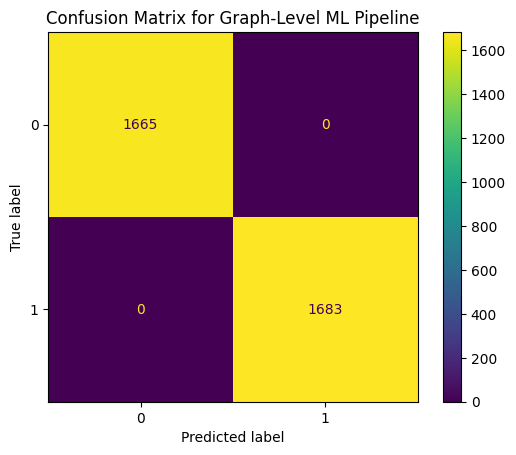

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# For demonstration, use the previously generated features_df and synthetic_labels.
# If not already defined, create a dummy features_df.
if 'features_df' not in globals():
    features_df = pd.DataFrame({
        'num_submissions': np.random.randint(1, 20, 100),
        'avg_score': np.random.rand(100) * 100,
        'total_comments': np.random.randint(0, 100, 100)
    })
if 'synthetic_labels' not in globals():
    median_score = features_df['avg_score'].median()
    synthetic_labels = (features_df['avg_score'] > median_score).astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df, synthetic_labels, test_size=0.2, random_state=42)

# Build the graph-level ML pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate pipeline performance
y_pred = pipeline.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix for Graph-Level ML Pipeline")
plt.show()


## Section 5: Evaluation and Optimization in Graph-Level Learning

**Objective:**  
- Understand methods for evaluating graph-level learning models.  
- Learn techniques to optimize model performance through hyperparameter tuning and regularization.

**Introduction:**  
- Evaluation metrics such as accuracy, F1-score, and ROC-AUC are essential for quantifying model performance.  
- Optimization strategies including hyperparameter tuning and regularization help improve model generalization and robustness.

**Key Points:**  
- Common evaluation metrics: accuracy, F1-score, ROC-AUC.  
- Optimization techniques: hyperparameter tuning (e.g., grid search), regularization methods (L1, L2).  
- Cross-validation ensures reliable performance estimates.

**Code Examples:**  
- Code to evaluate a graph-level classification model using standard metrics.  
- Visualization of performance metrics, including a confusion matrix and ROC curve.  
- Example code for hyperparameter tuning using grid search.

**Observations & Explanations:**  
- Evaluation metrics provide quantitative insights into model performance.  
- Hyperparameter tuning can significantly enhance performance by optimizing model parameters.  
- Visualizations such as confusion matrices and ROC curves help in understanding model behavior.

**Practical Activities:**  
- Implement evaluation metrics for a graph-level model using the dataset.  
- Experiment with hyperparameter tuning via grid search.  
- Visualize model performance using confusion matrices and ROC curves.

**Quiz:**  
1. What evaluation metrics are commonly used in graph-level learning?  
2. How does hyperparameter tuning improve model performance?


Best Hyperparameters:
{'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1665
           1       1.00      1.00      1.00      1683

    accuracy                           1.00      3348
   macro avg       1.00      1.00      1.00      3348
weighted avg       1.00      1.00      1.00      3348



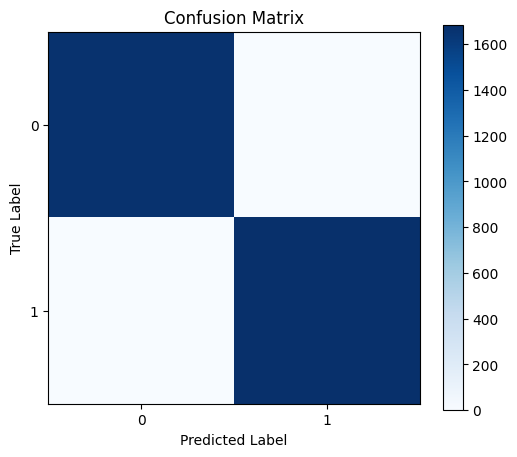

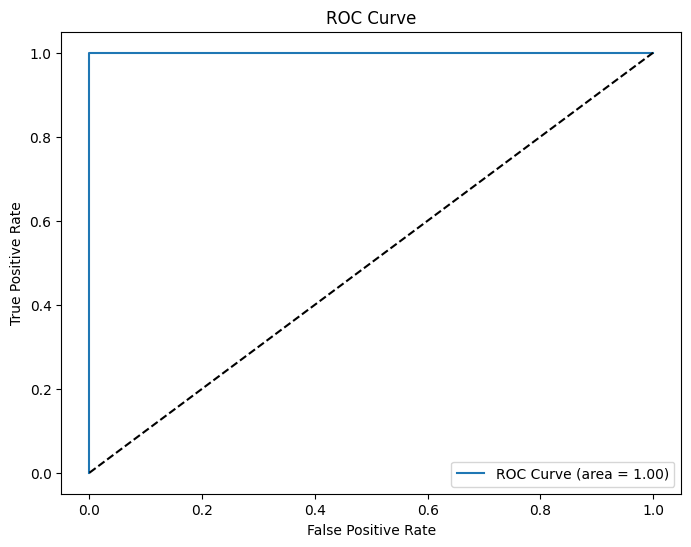

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV

# Use features_df and synthetic_labels if defined; otherwise, create dummy data
if 'features_df' not in globals():
    features_df = pd.DataFrame({
        'num_submissions': np.random.randint(1, 20, 100),
        'avg_score': np.random.rand(100) * 100,
        'total_comments': np.random.randint(0, 100, 100)
    })
if 'synthetic_labels' not in globals():
    median_score = features_df['avg_score'].median()
    synthetic_labels = (features_df['avg_score'] > median_score).astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df, synthetic_labels, test_size=0.2, random_state=42)

# Build the graph-level ML pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define hyperparameter grid for tuning
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:")
print(grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, [0, 1])
plt.yticks(tick_marks, [0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot ROC Curve
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


## All Quiz Answers

1. **Section 1: Graph Classification Tasks and Their Significance**  
   - Graph classification differs from node-level classification by evaluating the entire graph structure rather than individual node features.  
   - It is important because it captures global graph properties, enabling tasks such as community detection and comprehensive network analysis.

2. **Section 2: Pooling Techniques for Graph-Level Learning**  
   - Pooling aggregates node-level features into a fixed-size graph representation.  
   - Attention-based pooling differs from mean and max pooling by dynamically weighing node contributions based on their importance.

3. **Section 3: Applications in Graph-Level Learning: Molecule Classification and Anomaly Detection**  
   - Graph-level learning can be applied in molecule classification by representing molecules as graphs and extracting features to predict molecular properties.  
   - Graph features are critical in anomaly detection as they help identify deviations from normal patterns in network data.

4. **Section 4: Building Graph-Level ML Pipelines**  
   - Key components of a graph-level ML pipeline include data preprocessing, feature extraction, model training, evaluation, and explainability integration.  
   - Pipeline integration is crucial for ensuring reproducibility, scalability, and streamlined workflows in graph-level learning.

5. **Section 5: Evaluation and Optimization in Graph-Level Learning**  
   - Common evaluation metrics include accuracy, F1-score, and ROC-AUC.  
   - Hyperparameter tuning improves model performance by optimizing parameters, leading to better generalization and robust performance.
